<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/Examen%201er%20parcial/Problema2_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema 25**
Un quiosquero vende periódicos a $\,1.10\,$ euros cada uno. Cada periódico le cuesta al quiosquero $\,0.90\,$ euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tabla siguiente:

|Periódicos|30|40|50|60|70|
|-|-|-|-|-|-|
|f(x)|20%|25%|25%|20%|10%|

La tabla recoge por ejemplo que el $\,20\%\,$ del tiempo las ventas han sido de $\,30\,$ periódicos. Teniendo en cuenta el coste de $\,0.20\,$ euros por venta perdida y el coste de $\,0.10\,$ euros por el reciclaje de cada periódico no vendido, determine el beneficio promedio diario si pide $\,50\,$ periódicos cada día.

# **Resolución**
## **1. Identifique las variables.**

Tenemos dos: 

1.   $X:=$ Número total de personas en un día que estaban dispuestas a comprarle un periódico al quiosquero.

## **2. Determine la distribución de probabilidad.**

Debido a los datos proporcionados durante el planteamiento del problema, se sigue que la variable aleatoria $\,X\,$ posee una distribución discreta y arbitraria, proporcionada en la tabla presentada en el problema.

## **3. Modele las variables aleatorias.**

Habiendo deducido la distribución de la variable aleatoria, se sigue que

|$X$|30|40|50|60|70|
|-|-|-|-|-|-|
|$P(X)$|0.20|0.25|0.25|0.20|0.10|

## **4. Defina el modelo del sistema y los objetivos de la simulación.**

  Sea $\,N_{p_\text{p}}\,$ número de periódicos pedidos en un día por el quiosquero para su posterior venta.

### **Objetivo:**
Calcular el beneficio diario promedio en euros del quiosquero vendiendo periódicos. El beneficio diario queda modelado por la siguiente fórmula:

  \begin{align}
  1.10\,V_\text{c} - 0.90\,N_{p_\text{p}} - 0.10\,N_{p_{\text{nv}}} - 0.20\,V_\text{nc}
  \end{align}

donde

1.   $V_\text{c}:=$ Número de ventas concluidas (compradores que sí alcanzaron un periódico).
2.   $N_{p_\text{p}}:=$ Número de periódicos pedidos por el quiosquero para su posterior venta.
3.   $N_{p_\text{nv}}:=$ Número de periódicos que no se alcanzaron a vender.
4.   $V_\text{nc}:=$ Número de ventas no concluidas (compradores potenciales que no alcanzaron un periódico).

Ahora, se sigue que

  \begin{align}
  V_\text{c} &= \left\{\begin{array}{lcc}
                X & \text{si} & X < N_{p_\text{p}} \\
                N_{p_\text{p}} & \text{si} & X\geq N_{p_\text{p}}
                \end{array}\right. \\\\
  N_{p_{\text{nv}}} &= \left\{\begin{array}{lcc}
                       N_{p_\text{p}} - X & \text{si} & X < N_{p_\text{p}} \\
                       0 & \text{si} & X\geq N_{p_\text{p}}
                       \end{array}\right. \\\\
  V_{\text{nc}} &= \left\{\begin{array}{lcc}
                   0 & \text{si} & X\leq N_{p_\text{p}} \\
                   X - N_{p_\text{p}} & \text{si} & X > N_{p_\text{p}}
                   \end{array}\right. \\\\
  \end{align}

Por lo tanto, implementamos el siguiente código:

In [121]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [122]:
def observacion(N_pp):                                                                # Función que devuelve el beneficio de un día,
  X = np.random.choice([30, 40, 50, 60, 70], p = [0.20, 0.25, 0.25, 0.20, 0.10])    #dado en número determinado de periódicos pedidos 
  if X < N_pp:              
    V_c = X
    N_pnv = N_pp - X
    V_nc = 0
  elif X == N_pp:
    V_c = N_pp
    N_pnv = 0
    V_nc =  0
  else:
    V_c = N_pp
    N_pnv = 0
    V_nc = X - N_pp
  return 1.10*V_c - 0.90*N_pp - 0.10*N_pnv - 0.20*V_nc

In [123]:
N_pp = 50  # Número de periódicos pedidos para su posterior venta.

In [124]:
observacion(N_pp)

-2.0

## **5. Diseñe el experimento.**

Para estimar el beneficio diario promedio, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa el beneficio promedio deseado a estimar.

In [125]:
def experimento(n, N_pp):          # Función que devuelve lista "evol_ben" con los beneficios diarios estimados, los cuales se
  evol_ben = []                    #calculan utilizando la fórmula que modela presentada anteriormente y luego dividimos esta
  obs = 0                          #cantidad entre las veces que se ha repetido la observación del sistema (número de días estudiado). 
  for i in range(n):               #Todo esto con "N_pp" arbitraria y mientras aumenta el número de días a "n".
    obs += observacion(N_pp)
    evol_ben.append(obs/(i+1))
  return evol_ben

In [126]:
evol_ben = experimento(3000, N_pp)    # Realizamos el experimento con tamaño de muestra (número de días) grande y arbitraria.

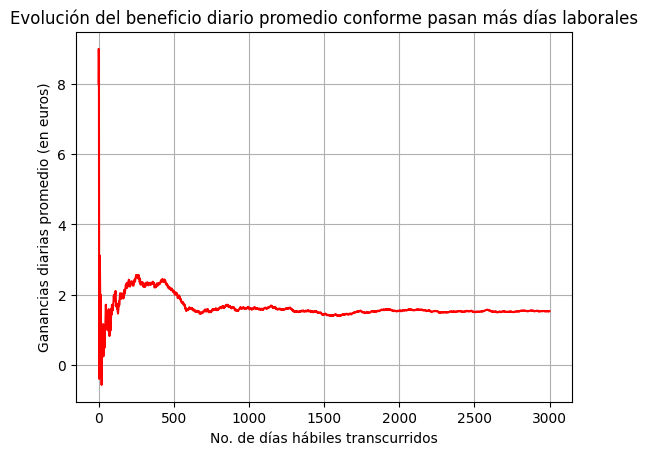

In [127]:
plt.plot(evol_ben, 'r')                            # La gráfica muestra que la convergencia está garantizada con 1500 iteraciones.
plt.xlabel('No. de días hábiles transcurridos')    
plt.ylabel('Ganancias diarias promedio (en euros)')
plt.grid(True)
plt.title('Evolución del beneficio diario promedio conforme pasan más días laborales')
plt.show()

In [128]:
n = 1500    # Definiendo tamaño de muestra "n" para cada experimento a simular.

In [129]:
print('mu =', np.mean(evol_ben), ', sigma =', np.std(evol_ben))

mu = 1.6370290123435665 , sigma = 0.3601851592842277


## **6. Repita el experimento $N$ veces.**

Primero, necesitamos determinar el número $N$ de veces necesarias que se debe simular el experimento para que la probabilidad estimada de que ocurra la observación deseada difiera de su valor verdadero en menos de $\epsilon$ con un nivel de confianza del $(1 − \alpha)\%$.

Este número $N$ está dado por

  \begin{align}
  N > \left( \frac{2 \sigma Z_{\alpha/2}}{\epsilon} \right)^2
  \end{align}

Implementamos el siguiente código:

In [130]:
epsilon = 0.05    # Establecer la cota superior epsilon para el error del beneficio diario promedio.
alpha = 0.05      # Indicar el grado de significancia que tendrá el valor establecido para epsilon.

In [131]:
N = int(np.ceil((2*np.std(evol_ben)*norm.ppf(1-alpha/2)/epsilon)**2))    # Cálculo del número de simulaciones del experimento
print(N)

798


In [132]:
def simulacion(N, N_pp):               # Función que devuelve una lista con los beneficios diarios promedio estimados de los N
  ben = []                             #experimentos realizados para el número de periódicos pedidos N_pp indicado.
  for i in range(N):
    evol_ben = experimento(n, N_pp)    
    ben.append(np.mean(evol_ben))
  return ben

In [133]:
ben = simulacion(N, N_pp)    # Realizamos la simulación.

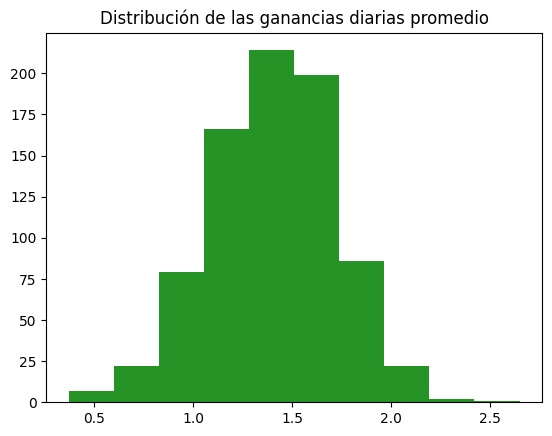

In [134]:
plt.hist(ben, color = 'g', alpha = 0.85)    # La gráfica nos sugiere que la distribución del beneficio diario promedio
plt.grid(False)                             #aparentemente es normal.
plt.title('Distribución de las ganancias diarias promedio')
plt.show()

In [135]:
print('mu =', np.mean(ben), ', sigma =', np.std(ben))

mu = 1.406091620291649 , sigma = 0.31434737759953657


## **7. Hallamos el intervalo de confianza.**

Utilizamos la fórmula
  \begin{align}
  \bar{x} - Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}
  \end{align}

Implementamos el siguiente código:

In [136]:
mu = np.mean(ben)                                         # Se presentan los intervalos de confianza para la media estimada en
li = mu - norm.ppf(1-alpha/2) * np.std(ben)/np.sqrt(n)    #cada caso de la forma: 
ls = mu + norm.ppf(1-alpha/2) * np.std(ben)/np.sqrt(n)    #
print(li, '<', mu, '<', ls)                               #       Caso: Límite inferior < Media estimada < Límite superior

1.3901837404053843 < 1.406091620291649 < 1.4219995001779135


## **8. Comparamos con la solución analítica.**

La fórmula para el beneficio diario en el caso $\,X < N_{p_\text{p}} = 50\,$ es

  \begin{align}
  B_1(X) &= 1.10\,X - 0.90\,N_{p_\text{p}} - 0.10\,(N_{p_\text{p}} - X) - 0.20\cdot 0 \\
  &= 1.2\,X - 50
  \end{align}

Ahora, el beneficio para el caso $\,X = 50$.

  \begin{align}
  B_2(X) &= 1.10\,N_{p_\text{p}} - 0.90\,N_{p_\text{p}} - 0.10\cdot 0 - 0.20\cdot 0 \\
  &= 10
  \end{align}

Y por último, el beneficio para el caso $\,X > 50$.

  \begin{align}
  B_3(X) &= 1.10\,N_{p_\text{p}} - 0.90\,N_{p_\text{p}} - 0.10\cdot 0 - 0.20\,(X - N_{p_\text{p}}) \\
  &= 20 - 0.2\,X
  \end{align}

Por lo tanto, para , la esperanza del beneficio diario queda definida como

  \begin{align}
  E[X] &= 0.20\cdot B_1(30) + 0.25\cdot B_1(40) + 0.25\cdot B_2(50) + 0.20\cdot B_3(60) + 0.10\cdot B_3(70) \\
  &= 0.20(-14) + 0.25(-2) + 0.25(10) + 0.20(8) + 0.10(6) \\
  &= 1.4
  \end{align}

In [137]:
mu_ana = 1.4     # Solución analítica.   

# **Solución**

In [138]:
print('Si el quiosquero pide ' + str(N_pp) + ' periódicos por día para su posterior venta,\n\n')

print('El beneficio diario promedio, estimado mediante simulación, por la venta de los periódicos es de ' + str(mu) + ' euros.\n')
print('El cual difiere en un ' + str(np.abs(mu - mu_ana)*100 / mu_ana) + '% de la solución analítica.')

Si el quiosquero pide 50 periódicos por día para su posterior venta,


El beneficio diario promedio, estimado mediante simulación, por la venta de los periódicos es de 1.406091620291649 euros.

El cual difiere en un 0.4351157351177859% de la solución analítica.


# **Optimización**

Sabemos que

  \begin{align}
  E[X]_{N_{p_\text{p}}} = B(N_{p_\text{p}}) &= 0.20\cdot B_1(30, N_{p_\text{p}}) + 0.25\cdot B_1(40, N_{p_\text{p}}) + 0.25\cdot B_2(50, N_{p_\text{p}}) + 0.20\cdot B_3(60, N_{p_\text{p}}) + 0.10\cdot B_3(70, N_{p_\text{p}}) \\
  &= 0.20(36 - N_{p_\text{p}}) + 0.25(48 - N_{p_\text{p}}) + 0.25(0.2\,N_{p_\text{p}}) + 0.20(0.4\,N_{p_\text{p}} - 12) + 0.10(0.4\,N_{p_\text{p}} - 14) \\
  &= 15.4 - 0.28\,N_{p_\text{p}}
  \end{align}

Ahora procedemos a maximizar $\,B(N_{p_\text{p}})\,$ mediante una optimización Montecarlo.

Implementamos el siguiente código:

In [139]:
N_mc = 1000000          # Ingresamos el número de veces que se repetira la optimización Montecarlo ("búsqueda aleatoria pura").

In [140]:
Bmax = float('-inf')            # Proponemos nuestro primer valor optimal: el más pequeño posible.
xplt, yplt = [], []
for i in range(N_mc):           # Se implementa una optimización Montecarlo para encontrar el número de periódicos que hay que pedir
  u = random.uniform(30, 70)    #para maximizar el beneficio diario promedio.
  Bu = 15.4 - 0.28*u
  xplt.append(u)
  yplt.append(Bu)
  if Bu > Bmax:
    Bmax = Bu
    N_ppmax = u
print('Número de periódicos optimal: ' + str(N_ppmax))
print('Máximo beneficio diario promedio: ' + str(Bmax))

Número de periódicos optimal: 30.000013692326867
Máximo beneficio diario promedio: 6.9999961661484775


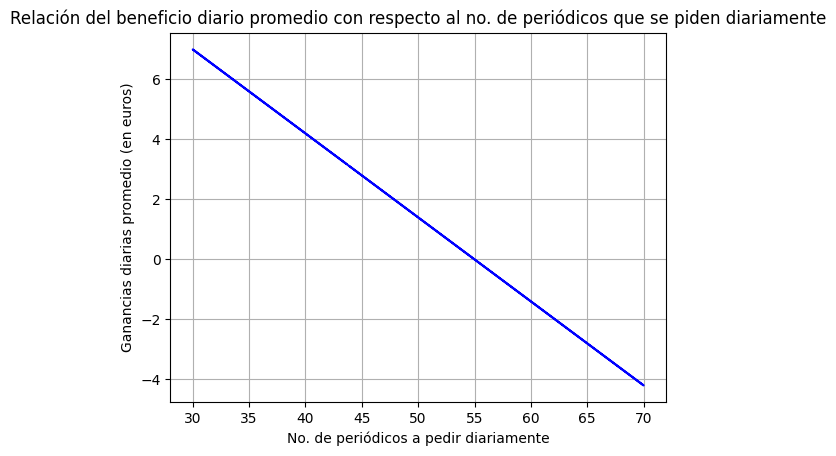

In [141]:
plt.plot(np.array(xplt), np.array(yplt), 'b')    # Graficamos la función optimizada y corroboramos visualmente los valores obtenidos.
plt.xlabel('No. de periódicos a pedir diariamente')    
plt.ylabel('Ganancias diarias promedio (en euros)')
plt.grid(True)
plt.title('Relación del beneficio diario promedio con respecto al no. de periódicos que se piden diariamente') 
plt.show()

In [142]:
print('El quiosquero debe pedir ' + str(round(N_ppmax)) + ' periódicos diariamente para maximizar sus ganancias.\n\n')
print('Así estaría ganando ' + str(round(15.4 - 0.28*round(N_ppmax), 2)) + ' euros diariamente.')

El quiosquero debe pedir 30 periódicos diariamente para maximizar sus ganancias.


Así estaría ganando 7.0 euros diariamente.
